In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-store-overview/SalesStore.csv


In [2]:
df = pd.read_csv('/kaggle/input/sales-store-overview/SalesStore.csv')

In [3]:
df.head()

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH
3,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
4,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10000482,Office Supplies,Tape,5,1,0.15,OH


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Date         216 non-null    object 
 1   Ship_Date          216 non-null    object 
 2   Ship_Mode          216 non-null    object 
 3   Postal_Code        216 non-null    int64  
 4   Region             216 non-null    object 
 5   Product_Reference  216 non-null    object 
 6   Category           216 non-null    object 
 7   Sub_Category       216 non-null    object 
 8   Sales              216 non-null    int64  
 9   Quantity           216 non-null    int64  
 10  Profit             216 non-null    float64
 11  State              216 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 20.4+ KB


In [5]:
df.columns = map(str.lower,df.columns)

In [6]:
df.order_date = pd.to_datetime(df.order_date,errors='coerce')
df.ship_date = pd.to_datetime(df.ship_date,errors='coerce')

In [7]:
df.describe(include='all')

,order_date,ship_date,ship_mode,postal_code,region,product_reference,category,sub_category,sales,quantity,profit,state
count,216,216,216,216.000000,216,216,216,216,216.000000,216.000000,216.000000,216
unique,NaN,NaN,2,NaN,4,161,3,32,NaN,NaN,NaN,9
top,NaN,NaN,Air,NaN,South,FUR-CH-10000454,Office Supplies,Chairs,NaN,NaN,NaN,TX
freq,NaN,NaN,110,NaN,76,6,73,13,NaN,NaN,NaN,32
mean,2022-07-12 14:40:00,2022-07-18 02:00:00,NaN,55241.750000,NaN,NaN,NaN,NaN,290.879630,2.393519,5.843287,NaN
min,2021-02-15 00:00:00,2021-02-20 00:00:00,NaN,20001.000000,NaN,NaN,NaN,NaN,5.000000,1.000000,0.150000,NaN
25%,2021-10-05 00:00:00,2021-10-12 00:00:00,NaN,33101.000000,NaN,NaN,NaN,NaN,50.000000,1.000000,1.000000,NaN
50%,2022-06-23 00:00:00,2022-06-28 00:00:00,NaN,60601.000000,NaN,NaN,NaN,NaN,200.000000,2.000000,4.000000,NaN
75%,2023-04-21 00:00:00,2023-04-28 00:00:00,NaN,75205.000000,NaN,NaN,NaN,NaN,450.000000,3.000000,9.000000,NaN
max,2024-01-09 00:00:00,2024-01-14 00:00:00,NaN,98101.000000,NaN,NaN,NaN,NaN,900.000000,4.000000,18.000000,NaN


In [8]:
df['order_year'] = df.order_date.dt.year
df['ship_year'] = df.ship_date.dt.year
df['order_year_quarter']=df.order_date.dt.to_period('Q').dt.strftime('%Y-Q%q')
df['order_month'] = df.order_date.dt.month_name().str.slice(stop=3)
df['ship_month'] = df.ship_date.dt.month_name().str.slice(stop=3)
df['ship_year_quarter']=df.ship_date.dt.to_period('Q').dt.strftime('%Y-Q%q')


In [9]:
df.head()

,order_date,ship_date,ship_mode,postal_code,region,product_reference,category,sub_category,sales,quantity,profit,state,order_year,ship_year,order_year_quarter,order_month,ship_month,ship_year_quarter
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH,2021,2021,2021-Q1,Feb,Feb,2021-Q1
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH,2021,2021,2021-Q1,Feb,Feb,2021-Q1
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH,2021,2021,2021-Q1,Feb,Feb,2021-Q1
3,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH,2021,2021,2021-Q1,Feb,Feb,2021-Q1
4,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10000482,Office Supplies,Tape,5,1,0.15,OH,2021,2021,2021-Q1,Feb,Feb,2021-Q1


Text(0.5, 1.0, 'Ship Month vs Profit')

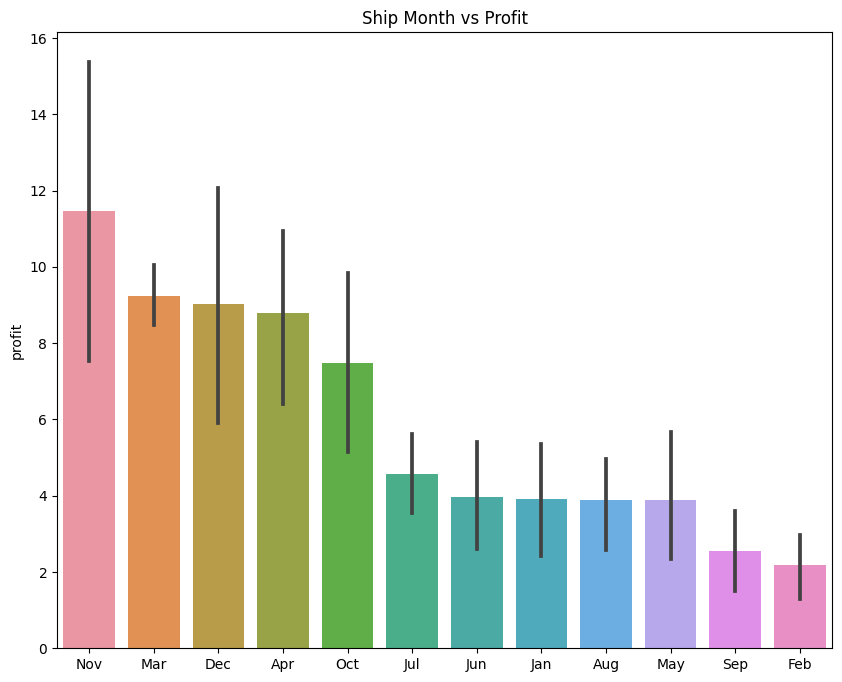

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='ship_month',y='profit',order=df.groupby('ship_month')['profit'].mean().sort_values(ascending=False).index)

plt.xlabel('')
plt.title('Ship Month vs Profit')

Text(0.5, 1.0, 'Order Month vs Profit')

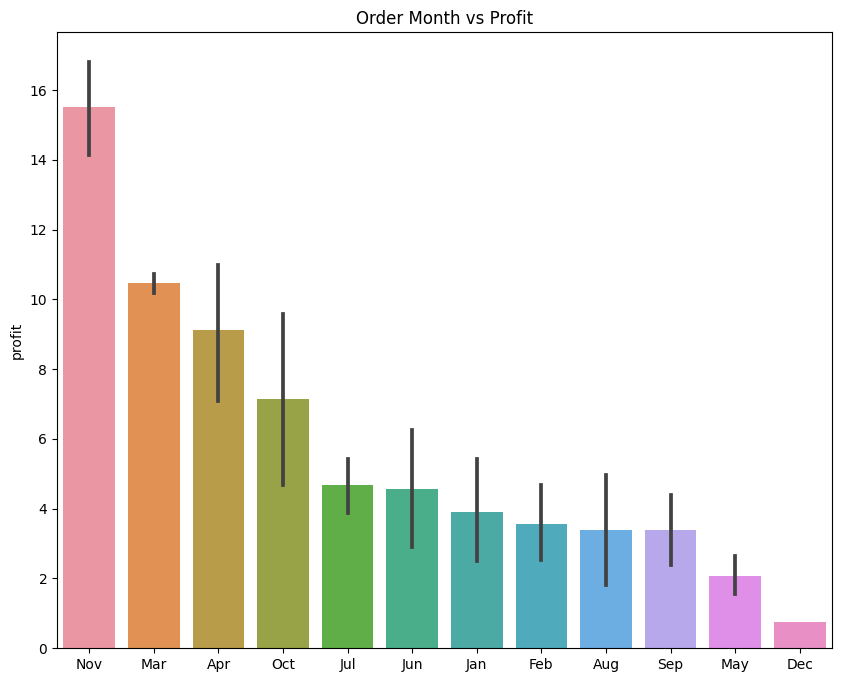

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='order_month',y='profit',order=df.groupby('order_month')['profit'].mean().sort_values(ascending=False).index)

plt.xlabel('')
plt.title('Order Month vs Profit')

In [12]:
df['ship_month2'] = df.ship_date.dt.month
df['order_month2'] = df.order_date.dt.month


([<matplotlib.axis.XTick at 0x7bbdf52938e0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

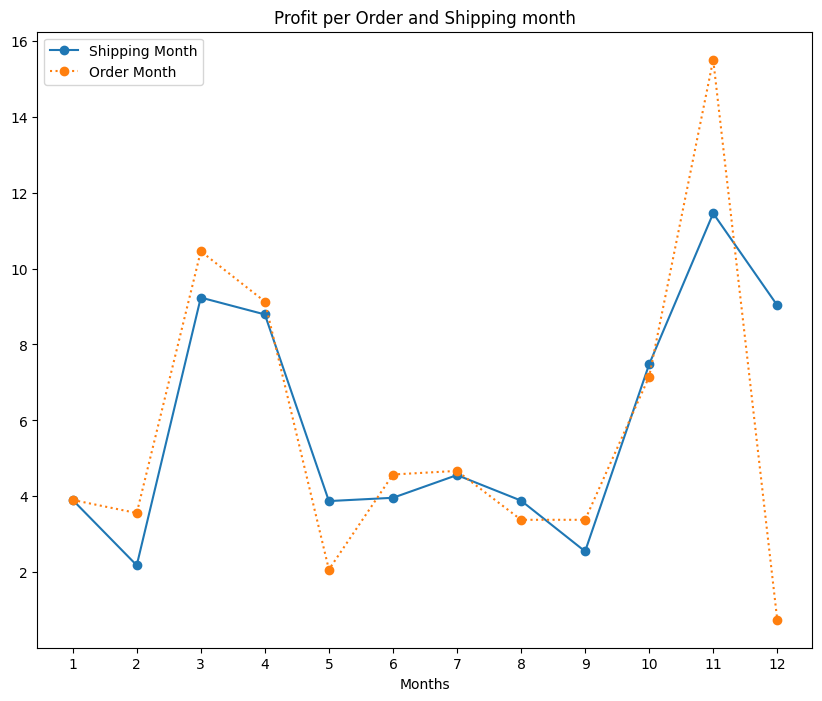

In [13]:
plt.figure(figsize=(10,8))
df.groupby('ship_month2')['profit'].mean().sort_index().plot(marker='o', label='Shipping Month')
df.groupby('order_month2')['profit'].mean().sort_index().plot(marker='o', label='Order Month', linestyle=':')
plt.legend()
plt.title('Profit per Order and Shipping month')
plt.xlabel('Months')
plt.xticks(range(1,13,1))

In [17]:
pd.pivot_table(data=df,index=['order_year_quarter','sub_category'],values='profit',aggfunc='mean')

profit
order_year_quarter sub_category             
2021-Q1            Chairs              10.00
                   Phones              10.00
                   Tape                 0.15
2021-Q2            Chairs               4.00
                   Paper                2.00
                   Sofas               14.00
                   Tablets              9.00
2021-Q3            Chairs               6.00
                   Markers              0.40
                   Speakers             2.40
2021-Q4            Beds                18.00
                   Erasers              0.36
                   Laptops             16.00
2022-Q1            Desks                9.00
                   Monitors             7.00
                   Pens                 1.00
2022-Q2            Envelopes            0.30
                   Headphones           3.00
                   Pencils              0.30
                   Smartphones         14.00
                   Tables               8.00
2022-Q3            Notebooks            2.40
                   Storage              5.00
                   Tables               6.00
2022-Q4            Bookcases           12.00
                   Cameras             12.00
                   Laptops             17.00
2023-Q1            Glue                 0.20
                   Notebooks            2.00
                   Outdoor Furniture   11.00
                   Smartwatches         4.00
2023-Q2            Accessories          2.00
                   Bookcases           11.00
                   Staplers             0.90
2023-Q3            Desks                7.00
                   Headphones           3.60
                   Printers             5.60
                   Rulers               0.24
2023-Q4            Lighting             3.60
                   Scissors             0.75
                   Staplers             0.75
2024-Q1            Printers             6.00

Text(0.5, 1.0, 'Average Sales by Region and Ship mode')

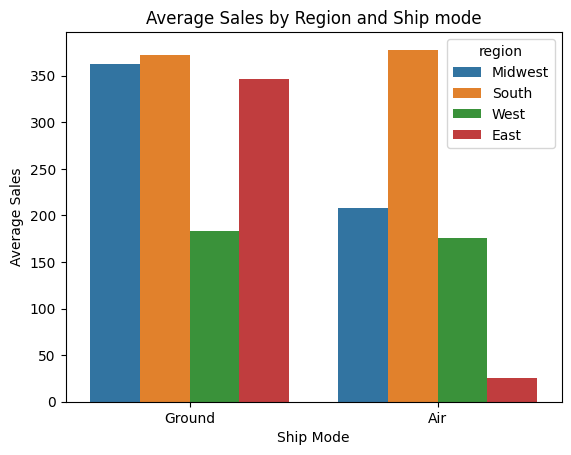

In [20]:
sns.barplot(data=df,x='ship_mode',y='sales',hue='region', errorbar=None)
plt.ylabel('Average Sales')
plt.xlabel('Ship Mode')
plt.title('Average Sales by Region and Ship mode')

Ship mode has no influence on average sales in the Southern region. Going to check if this difference in average sales in the different regions is by chance.

In [21]:
no_south = df.loc[df.region!='South']
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [22]:
result = pairwise_tukeyhsd(no_south.sales,no_south.region)

In [24]:
print(result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
   East Midwest    -3.071 0.9981   -127.18 121.0379  False
   East    West -102.8435 0.1458 -231.8652  26.1782  False
Midwest    West  -99.7725 0.0723 -206.5405   6.9955  False
----------------------------------------------------------


None of the differences in average sale prices is by chance.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_date          216 non-null    datetime64[ns]
 1   ship_date           216 non-null    datetime64[ns]
 2   ship_mode           216 non-null    object        
 3   postal_code         216 non-null    int64         
 4   region              216 non-null    object        
 5   product_reference   216 non-null    object        
 6   category            216 non-null    object        
 7   sub_category        216 non-null    object        
 8   sales               216 non-null    int64         
 9   quantity            216 non-null    int64         
 10  profit              216 non-null    float64       
 11  state               216 non-null    object        
 12  order_year          216 non-null    int32         
 13  ship_year           216 non-null    int32         

In [35]:
max_category = df.groupby(['category'])['sales'].transform(max)
df.loc[df['sales']==max_category,['category','sub_category','sales']].drop_duplicates()
#Subcategory with max sales

,category,sub_category,sales
62,Furniture,Beds,900
115,Office Supplies,Notebooks,120
136,Electronics,Laptops,850


In [38]:
df['profit_sales'] = df.profit/df.sales

In [40]:
df.groupby('region')['profit_sales'].mean()

region
East       0.022000
Midwest    0.021475
South      0.020789
West       0.022041
Name: profit_sales, dtype: float64

In [42]:
df.groupby('category')['profit_sales'].mean()

category
Electronics        0.020000
Furniture          0.020000
Office Supplies    0.024247
Name: profit_sales, dtype: float64

In [46]:
pd.pivot_table(data=df,index=['order_year','category'],columns='sub_category',values='quantity',aggfunc='max',fill_value=0).T

order_year               2021                                  2022            \
category          Electronics Furniture Office Supplies Electronics Furniture   
sub_category                                                                    
Accessories                 0         0               0           0         0   
Beds                        0         4               0           0         0   
Bookcases                   0         0               0           0         4   
Cameras                     0         0               0           3         0   
Chairs                      0         3               0           0         0   
Desks                       0         0               0           0         1   
Envelopes                   0         0               0           0         0   
Erasers                     0         0               4           0         0   
Glue                        0         0               0           0         0   
Headphones                  0         0               0           3         0   
Laptops                     2         0               0           4         0   
Lighting                    0         0               0           0         0   
Markers                     0         0               1           0         0   
Monitors                    0         0               0           3         0   
Notebooks                   0         0               0           0         0   
Outdoor Furniture           0         0               0           0         0   
Paper                       0         0               1           0         0   
Pencils                     0         0               0           0         0   
Pens                        0         0               0           0         0   
Phones                      2         0               0           0         0   
Printers                    0         0               0           0         0   
Rulers                      0         0               0           0         0   
Scissors                    0         0               0           0         0   
Smartphones                 0         0               0           3         0   
Smartwatches                0         0               0           0         0   
Sofas                       0         3               0           0         0   
Speakers                    2         0               0           0         0   
Staplers                    0         0               0           0         0   
Storage                     0         0               0           0         1   
Tables                      0         0               0           0         1   
Tablets                     2         0               0           0         0   
Tape                        0         0               1           0         0   

order_year                               2023                            \
category          Office Supplies Electronics Furniture Office Supplies   
sub_category                                                              
Accessories                     0           1         0               0   
Beds                            0           0         0               0   
Bookcases                       0           0         3               0   
Cameras                         0           0         0               0   
Chairs                          0           0         0               0   
Desks                           0           0         2               0   
Envelopes                       2           0         0               0   
Erasers                         0           0         0               0   
Glue                            0           0         0               4   
Headphones                      0           1         0               0   
Laptops                         0           0         0               0   
Lighting                        0           0         2               0   
Markers                         0      